In [19]:
import os
import sys

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import math
import warnings


print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/construction_work', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg', '/home/rfpred/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode', '/home/rfpred/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode', '/home/rfpred/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode', '/home/rfpred/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdc

In [20]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)
# importlib.reload(funcs.brain_mapping)
from funcs.brain_mapping import reg_to_nifti, vol_to_surf

rd = RegData
rl = Reloader

# Ignore the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


In [10]:
# for subject in NSP.subjects:
    # for angle in [90, 210, 330]:
subject = "subj01"
angle = 90
    
vgg16results = rd(subject=subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True) # Norm layer is not in the encoding featmaps (i think)
datfram = vgg16results.df
# vgg16results.assign_layers(max_or_weighted="max",
#                         verbose=True,
#                         title=f"Unpredictability layer assignment across visual cortex ecc 2.0 angle {angle}\nVGG16, ΔR based (Baseline vs. Baseline + Unpredictability)",
#                         #   figsize = (6 , 5.5))
#                         figsize = (6.5 , 5))

# vgg16results.mean_lines(fit_polynom = False,
#             polynom_order = 4,
#             verbose = True,
#             plot_catplot = False,
#             title = "Layer-specific unpredictability effect across visual cortex\nVGG16, Δβ based (Baseline vs. Baseline + Unpredictability)")

datfram

x   y   z roi  delta_r_2  delta_r_3  delta_r_4     delta_r_5  \
0     63  17  55  V1   0.014806   0.015336   0.014465  1.427666e-02   
1     67   6  66  V1   0.026967   0.027290   0.026288  2.585931e-02   
2     67   8  65  V1   0.043803   0.044003   0.043533  4.317094e-02   
3     67   9  64  V1   0.050901   0.051065   0.051214  5.097084e-02   
4     67   9  66  V1   0.009871   0.010096   0.009996  9.843606e-03   
..   ...  ..  ..  ..        ...        ...        ...           ...   
188   96  33  72  V4   0.000725   0.000670   0.000844  8.755191e-04   
189   96  34  72  V4   0.001076   0.001090   0.001088  1.105122e-03   
190  112  28  63  V4  -0.000710  -0.000793  -0.000730 -7.100114e-04   
191  112  31  63  V4   0.005458   0.005296   0.005283  5.175449e-03   
192  113  28  63  V4   0.000096  -0.000077   0.000011  2.911194e-07   

     delta_r_6  delta_r_7  delta_r_8  delta_r_9  delta_r_10  delta_r_11  \
0     0.013970   0.013690   0.013273   0.012857    0.012563    0.011665   
1     0.026171   0.025025   0.022433   0.021794    0.021650    0.020940   
2     0.043674   0.042395   0.039442   0.038262    0.037467    0.036085   
3     0.051476   0.050496   0.047962   0.046595    0.045454    0.043533   
4     0.009894   0.009525   0.008777   0.008309    0.008038    0.007740   
..         ...        ...        ...        ...         ...         ...   
188   0.000820   0.000974   0.001429   0.001635    0.001654    0.001624   
189   0.001033   0.001117   0.001357   0.001543    0.001618    0.001496   
190  -0.000600  -0.000640  -0.000795  -0.000764   -0.000691   -0.000562   
191   0.005436   0.005496   0.005188   0.005316    0.005467    0.005711   
192   0.000196   0.000290   0.000205   0.000325    0.000444    0.000588   

     delta_r_12  delta_r_13  delta_r_14  delta_r_15  delta_r_16  delta_r_17  
0      0.009896    0.006554    0.004568    0.007226    0.014806    0.015336  
1      0.019814    0.015838    0.012814    0.020273    0.026967    0.027290  
2      0.034159    0.027708    0.022737    0.030537    0.043803    0.044003  
3      0.040611    0.032275    0.026210    0.033884    0.050901    0.051065  
4      0.007734    0.006895    0.005842    0.006552    0.009871    0.010096  
..          ...         ...         ...         ...         ...         ...  
188    0.001194    0.000461    0.000202    0.000744    0.000725    0.000670  
189    0.000940    0.000250    0.000115    0.000644    0.001076    0.001090  
190   -0.000214    0.000343    0.000521   -0.000134   -0.000710   -0.000793  
191    0.006157    0.006048    0.005493    0.004636    0.005458    0.005296  
192    0.000953    0.001389    0.001482    0.001154    0.000096   -0.000077  

[193 rows x 20 columns]

In [27]:
# Peripheral results, delta r unpredictability
for angle_no, angle in enumerate([90, 210, 330]):

    results = rd(
        subject=subject,
        folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
        model="vggfull",
        statistic="delta_r",
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)
    if angle_no == 0:
        peri_df = results.df
    else:
        peri_df = pd.concat([peri_df, results.df])

# datfram["roi"]

In [28]:
peri_df

x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     63  17  55  V1   0.014806   0.015336   0.014465   0.014277   0.013970   
1     67   6  66  V1   0.026967   0.027290   0.026288   0.025859   0.026171   
2     67   8  65  V1   0.043803   0.044003   0.043533   0.043171   0.043674   
3     67   9  64  V1   0.050901   0.051065   0.051214   0.050971   0.051476   
4     67   9  66  V1   0.009871   0.010096   0.009996   0.009844   0.009894   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
193   46  24  60  V4   0.004317   0.004778   0.004820   0.004818   0.004664   
194   49  25  60  V4   0.003999   0.003339   0.003060   0.003013   0.003189   
195   49  26  60  V4   0.003381   0.002890   0.002570   0.002568   0.002674   
196   96  22  60  V4   0.012616   0.012229   0.012623   0.012570   0.012653   
197  106  21  62  V4   0.060979   0.060019   0.060525   0.059821   0.061192   

     delta_r_7  delta_r_8  delta_r_9  delta_r_10  delta_r_11  delta_r_12  \
0     0.013690   0.013273   0.012857    0.012563    0.011665    0.009896   
1     0.025025   0.022433   0.021794    0.021650    0.020940    0.019814   
2     0.042395   0.039442   0.038262    0.037467    0.036085    0.034159   
3     0.050496   0.047962   0.046595    0.045454    0.043533    0.040611   
4     0.009525   0.008777   0.008309    0.008038    0.007740    0.007734   
..         ...        ...        ...         ...         ...         ...   
193   0.004663   0.004525   0.004292    0.004192    0.003688    0.002652   
194   0.002590   0.001743   0.001658    0.001595    0.001699    0.002136   
195   0.002217   0.001577   0.001476    0.001418    0.001431    0.001598   
196   0.012210   0.011703   0.011319    0.010636    0.010070    0.009158   
197   0.061630   0.060213   0.061045    0.061853    0.062244    0.061968   

     delta_r_13  delta_r_14  delta_r_15  delta_r_16  delta_r_17  
0      0.006554    0.004568    0.007226    0.014806    0.015336  
1      0.015838    0.012814    0.020273    0.026967    0.027290  
2      0.027708    0.022737    0.030537    0.043803    0.044003  
3      0.032275    0.026210    0.033884    0.050901    0.051065  
4      0.006895    0.005842    0.006552    0.009871    0.010096  
..          ...         ...         ...         ...         ...  
193    0.000918    0.000153    0.000456    0.004317    0.004778  
194    0.002741    0.003046    0.008180    0.003999    0.003339  
195    0.001692    0.001759    0.006104    0.003381    0.002890  
196    0.007346    0.006319    0.009933    0.012616    0.012229  
197    0.056020    0.050040    0.053383    0.060979    0.060019  

[660 rows x 20 columns]

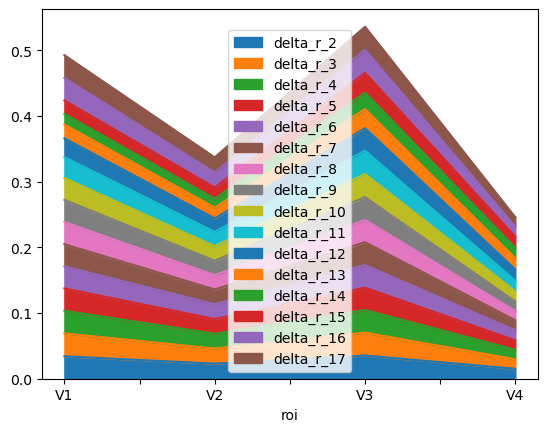

delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  delta_r_7  \
roi                                                                     
V1    0.034129   0.034849   0.034459   0.034033   0.033544   0.033780   
V2    0.022941   0.023009   0.022641   0.022268   0.022548   0.022564   
V3    0.035251   0.034906   0.034511   0.033962   0.034479   0.034786   
V4    0.015151   0.014410   0.014527   0.014304   0.015297   0.015291   

     delta_r_8  delta_r_9  delta_r_10  delta_r_11  delta_r_12  delta_r_13  \
roi                                                                         
V1    0.033891   0.033666    0.033197    0.031919    0.028562    0.020961   
V2    0.021758   0.021942    0.022141    0.021788    0.020473    0.016393   
V3    0.033920   0.034651    0.035324    0.035413    0.034264    0.029088   
V4    0.014010   0.014572    0.015415    0.016198    0.017212    0.016906   

     delta_r_14  delta_r_15  delta_r_16  delta_r_17  
roi                                                  
V1     0.016214    0.020472    0.034129    0.034849  
V2     0.013517    0.017072    0.022941    0.023009  
V3     0.025106    0.030123    0.035251    0.034906  
V4     0.015846    0.017030    0.015151    0.014410

In [238]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

# Plot the mean values
grouped.plot(kind='area')

# Show the plot
plt.show()

grouped

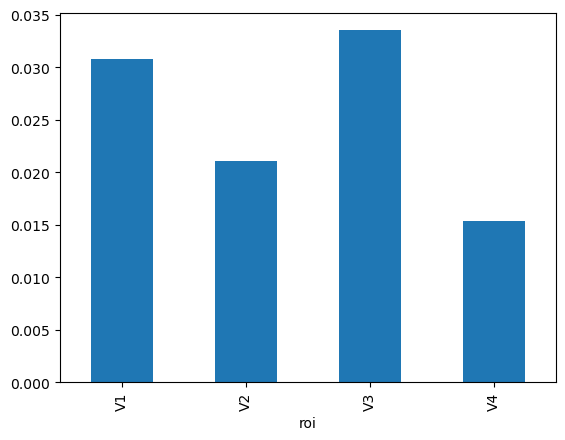

In [35]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

# Calculate the mean over all columns
peri_mean = grouped.mean(axis=1)

# Plot the mean values
peri_mean.plot(kind='bar')

# Show the plot
plt.show()

### Trying out whether I can do the same without taking the mean across abstraction layers of unpred feats

In [320]:
stat = "beta_unpred"
subject = "subj07"

# Peripheral results, delta r unpredictability
# for angle_no, angle in enumerate([90, 210, 330]):
for angle_no, angle in enumerate([210]):

    results = rd(
        subject=subject,
        folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
        model="vggfull",
        statistic=stat,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)
    if angle_no == 0:
        peri_df = results.df
    else:
        peri_df = pd.concat([peri_df, results.df])

# Group by 'roi' and calculate the mean, excluding the first three columns
peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

fov_results = rd(
    subject=subject,
    folder=f"unpred/vggfull_gabor_baseline",
    model="vggfull",
    statistic=stat,
    verbose=False,
    skip_norm_lay=True,
)  # Norm layer is not in the encoding featmaps (i think)

fov_df = fov_results.df

# Group by 'roi' and calculate the mean, excluding the first three columns
fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

In [321]:
# Assuming the two dataframes are `fov_df` and `peri_df`

# Add a new column 'source' to each dataframe
fov_grouped['source'] = 'fov'
peri_grouped['source'] = 'peri'

# Concatenate the two dataframes
combined_df = pd.concat([fov_grouped, peri_grouped])

# Reset the index
combined_df.reset_index(inplace=True)

In [532]:

def fovperi_per_lay(subject:str, statistic:str="delta_r", angles:list=[90, 210, 330], alpha=.5, cmap="copper"):
    # Peripheral results, delta r unpredictability
    # for angle_no, angle in enumerate([90, 210, 330]):
    for angle_no, angle in enumerate(angles):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()
        
    # Add a new column 'source' to each dataframe
    fov_grouped['source'] = 'fov'
    peri_grouped['source'] = 'peri'

    # Concatenate the two dataframes
    combined_df = pd.concat([fov_grouped, peri_grouped])

    # Reset the index
    combined_df.reset_index(inplace=True)
        
    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = combined_df.melt(id_vars=['roi', 'source'], value_vars=combined_df.columns[:-1], var_name='abstraction_level', value_name='Δr values')
        
    if cmap == "layassign":
        cmap = LinearSegmentedColormap.from_list(
            "NavyBlueVeryLightGreyDarkRed",
            [
                "#000039",
                "#0000C0",
                "#426CFF",
                "#8DC2FF",
                "#BDF7FF",
                "#E3E3E3",
                "#FFC90A",
                "#FF8B00",
                "#FF4D00",
                "#E90000",
                "#800000",
            ],
            N=16,
        )
    else:
        cmap = plt.cm.get_cmap(cmap, len(long_df['abstraction_level'].unique()))

    # Convert the colormap to a list of colors
    cmap = [cmap(i) for i in range(cmap.N)]

    # Extract the integer value after the last "_" in 'abstraction_level'
    long_df['abstraction_order'] = long_df['abstraction_level'].str.split("_").str[-1].astype(int)

    # Create the 'zorder' column based on the reverse of 'abstraction_order'
    long_df['zorder'] = long_df['abstraction_order'].max() - long_df['abstraction_order'] + 1

    # Sort the long_df by abstraction_order (reverse, or use any custom sort)
    long_df = long_df.sort_values(by='abstraction_order', ascending=False)

    # Create a FacetGrid with 'roi' as the column and 'abstraction_level' as the hue, and wrap the columns into a 2x2 grid
    g = sns.FacetGrid(long_df, col='roi', hue='abstraction_level', col_wrap=2, aspect=1, palette=cmap, height=4)

    # Map the lineplot to the FacetGrid
    g.map(sns.lineplot, 'source', 'Δr values', alpha=alpha, linewidth=3, zorder=1)

    # Map the scatterplot to the FacetGrid
    g.map(sns.scatterplot, 'source', 'Δr values', alpha=1, s=150, zorder=2)


    # # Create a FacetGrid with 'roi' as the column and 'abstraction_level' as the hue, and wrap the columns into a 2x2 grid
    # g = sns.FacetGrid(long_df, col='roi', hue='abstraction_level', col_wrap=2, aspect=1, palette=cmap, height=4)

    # # Map the lineplot to the FacetGrid
    # g.map(sns.lineplot, 'source', 'Δr values', alpha=alpha, linewidth=3, zorder=1)

    # # Map the scatterplot to the FacetGrid
    # g.map(sns.scatterplot, 'source', 'Δr values', alpha=1, s=150, zorder=2)

    # Get the handles and labels of the current legend
    handles, labels = g.axes.flat[0].get_legend_handles_labels()

    # Modify the labels to only the integer values at the end of the string label
    labels = [int(label.split('_')[-1])-1 for label in labels]

    # Get the unique labels
    labels = list(set(labels))

    # Create a custom legend
    legend_patches = [Patch(color=handle.get_color(), label=label) if isinstance(handle, Line2D) else Patch(color=handle.get_facecolor(), label=label) for handle, label in zip(handles, labels)]

    # Set the legend again with the new labels
    plt.legend(handles=legend_patches, title='Abstraction Level', bbox_to_anchor=(1.05, 2), loc='upper left')

    # Change the x-axis title
    g.set_xlabels('Visual field location')

    # Change the y-axis title
    g.set_ylabels('Δr values')

    # Set the title for each subplot
    for ax, title in zip(g.axes.flat, combined_df['roi'].unique()):
        ax.set_title(f"{title}")
        
    return long_df

In [8]:


def fovperi_per_lay(subject:str, statistic:str="delta_r", angles:list=[90, 210, 330], alpha=.5, cmap="copper"):
    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate(angles):
        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )

    fov_df = fov_results.df
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    # Add a new column 'source' to each dataframe
    fov_grouped['source'] = 'Fovea'
    peri_grouped['source'] = 'Parafovea'

    # Concatenate the two dataframes
    combined_df = pd.concat([fov_grouped, peri_grouped])

    # Reset the index
    combined_df.reset_index(inplace=True)
        
    y_axis_str = 'Δr values' if statistic == 'delta_r' else 'β coefficient'

        
    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = combined_df.melt(id_vars=['roi', 'source'], value_vars=combined_df.columns[:-1], var_name='abstraction_level', value_name=y_axis_str)

    # Extract the integer value after the last "_" in 'abstraction_level'
    long_df['abstraction_order'] = long_df['abstraction_level'].str.split("_").str[-1].astype(int)

    # Create the 'zorder' column based on the reverse of 'abstraction_order'
    long_df['zorder'] = long_df['abstraction_order'].max() - long_df['abstraction_order'] + 1

    # Create a custom order for the abstraction levels (change this to fit your desired order)
    abstraction_level_order = sorted(long_df['abstraction_level'].unique(), key=lambda x: int(x.split('_')[-1]), reverse=True)

    # Define the colormap and set the custom order for abstraction levels
    if cmap == "layassign":
        cmap = LinearSegmentedColormap.from_list(
            "NavyBlueVeryLightGreyDarkRed",
            [
                "#000039", "#0000C0", "#426CFF", "#8DC2FF", "#BDF7FF",
                "#E3E3E3", "#FFC90A", "#FF8B00", "#FF4D00", "#E90000", "#800000"
            ],
            N=16,
        )
    else:
        cmap = plt.cm.get_cmap(cmap, len(abstraction_level_order))

    # Convert the colormap to a list of colors
    cmap = [cmap(i) for i in range(cmap.N)][::-1]

    # Create a FacetGrid with 'roi' as the column and use the custom order for 'abstraction_level'
    g = sns.FacetGrid(
        long_df, col='roi', hue='abstraction_level', hue_order=abstraction_level_order,
        col_wrap=2, aspect=1, palette=cmap, height=4
    )

    # Map the lineplot to the FacetGrid
    g.map(sns.lineplot, 'source', y_axis_str, alpha=alpha, linewidth=3, zorder=1)

    # Map the scatterplot to the FacetGrid
    g.map(sns.scatterplot, 'source', y_axis_str, alpha=1, s=130, zorder=2)

    # Get the handles and labels of the current legend
    handles, labels = g.axes.flat[0].get_legend_handles_labels()

    # Modify the labels to only the integer values at the end of the string label
    labels = [int(label.split('_')[-1])-1 for label in labels]

    # Get the unique labels
    labels = list(set(labels))[::-1]

    # Create a custom legend
    legend_patches = [Patch(color=handle.get_color(), label=label) if isinstance(handle, Line2D) else Patch(color=handle.get_facecolor(), label=label) for handle, label in zip(handles, labels)]

    # Set the legend again with the new labels
    # plt.legend(handles=legend_patches, title='Abstraction Level', bbox_to_anchor=(1.05, 2), loc='upper left')

    # Change the x-axis title
    g.set_xlabels('Visual field location', fontsize=14, fontweight='bold')

    # Change the y-axis title
    g.set_ylabels(y_axis_str, fontsize=14, fontweight='bold')

    # Set the title for each subplot
    for ax, title in zip(g.axes.flat, combined_df['roi'].unique()):
        ax.set_title(f"{title}", fontsize=14)
        ax.set_xlim(ax.get_xlim()[0] - 0.02, ax.get_xlim()[1] + 0.02)
        
    g.set_xticklabels(["Fovea", "Parafovea"],fontsize=12)
    
    
    g.figure.suptitle(f'Unpredictability effects in fovea vs. parafovea\nSubject {subject[-1]}, patch angle {angles}°', fontsize=14, y=1.06, fontweight='bold')

    return long_df


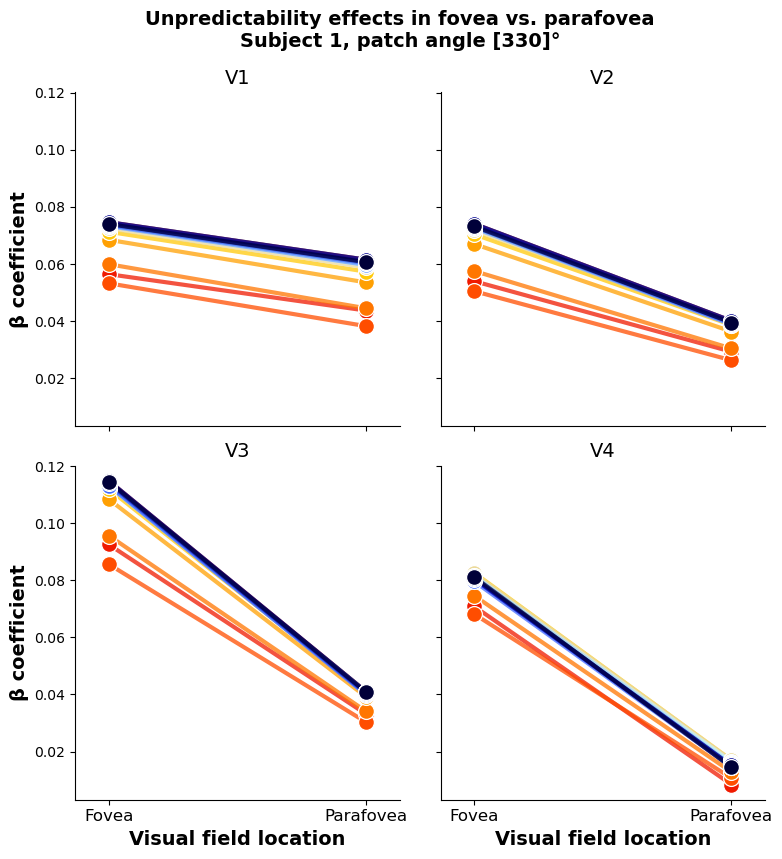

In [9]:
import seaborn as sns
# fovperi_per_lay(subject="subj04", statistic="beta_unpred", angles=[90, 210, 330], alpha=1, cmap="jet")
# for subject in NSP.subjects:
    # for angle in [90, 210, 330]:
    # fovperi_per_lay(subject=subject, statistic="beta_unpred", angles=[90,210,330], alpha=.75, cmap="layassign")
testdf = fovperi_per_lay(subject="subj01", statistic="beta_unpred", angles=[330], alpha=.75, cmap="layassign")

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


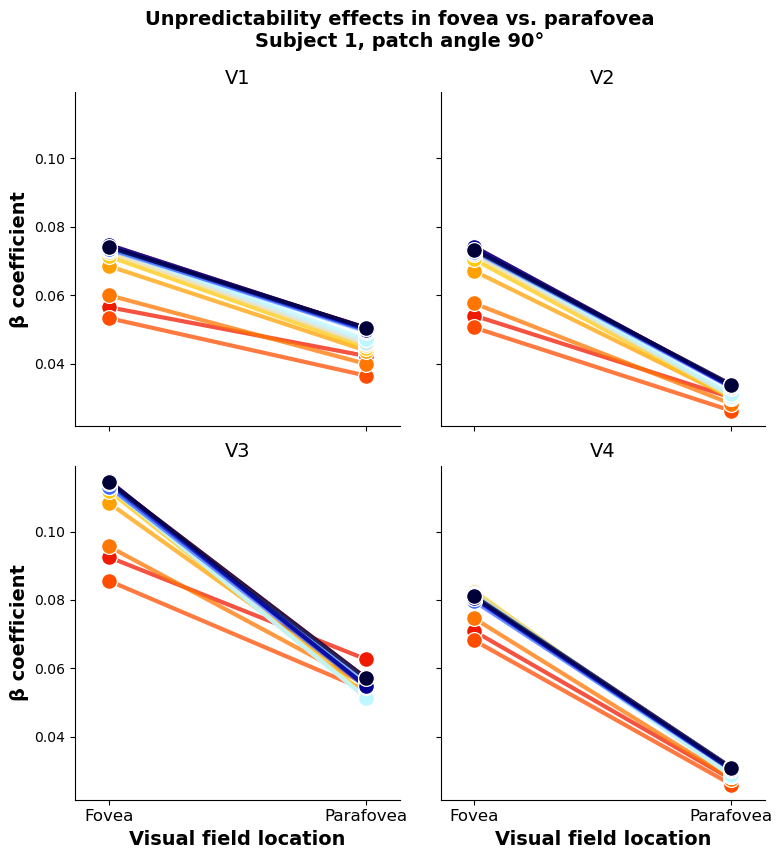

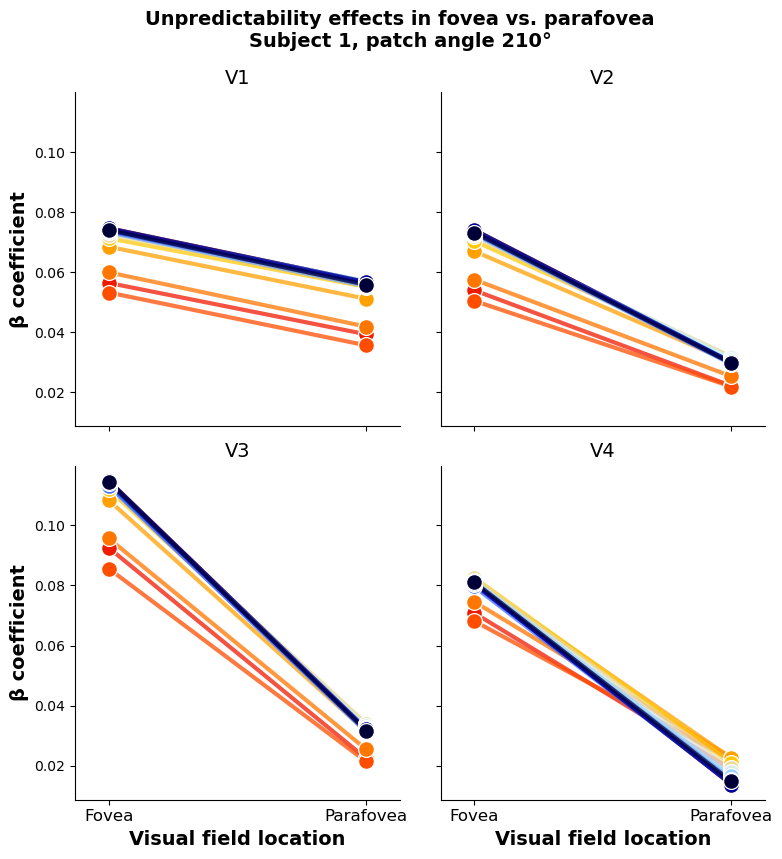

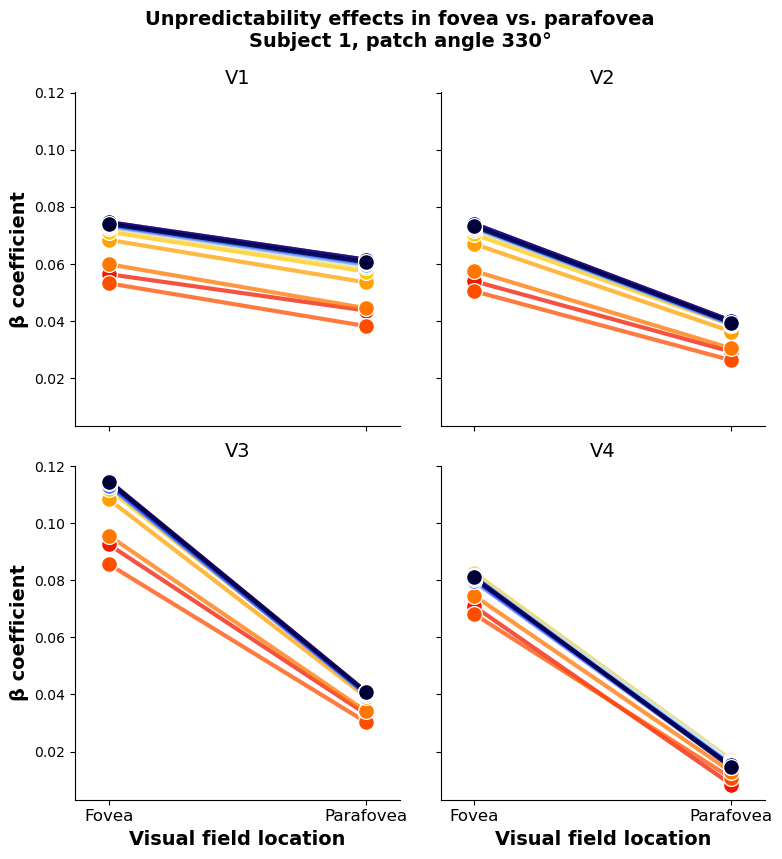

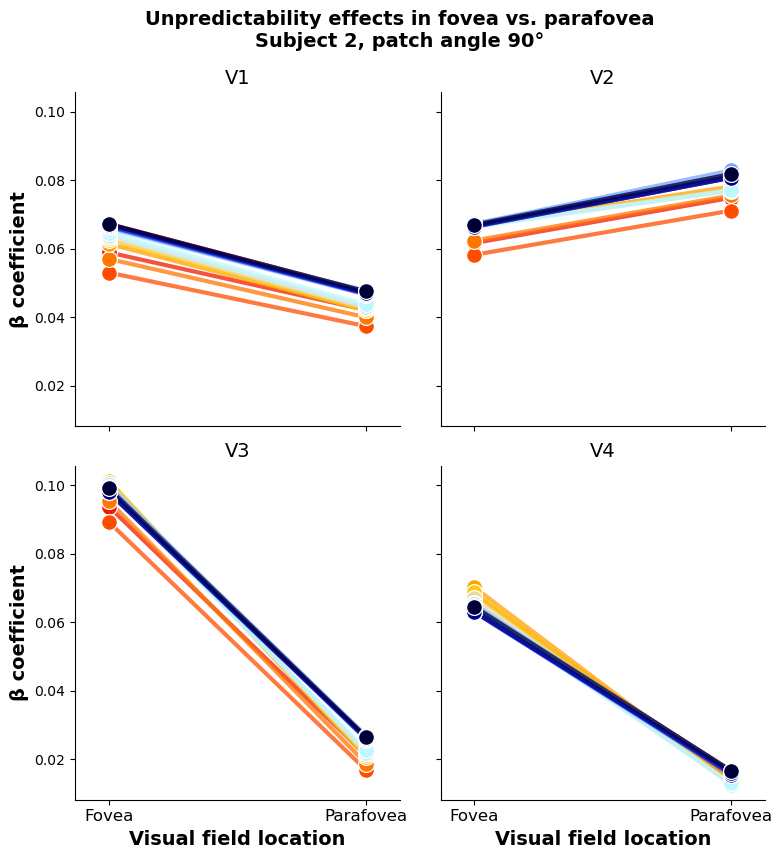

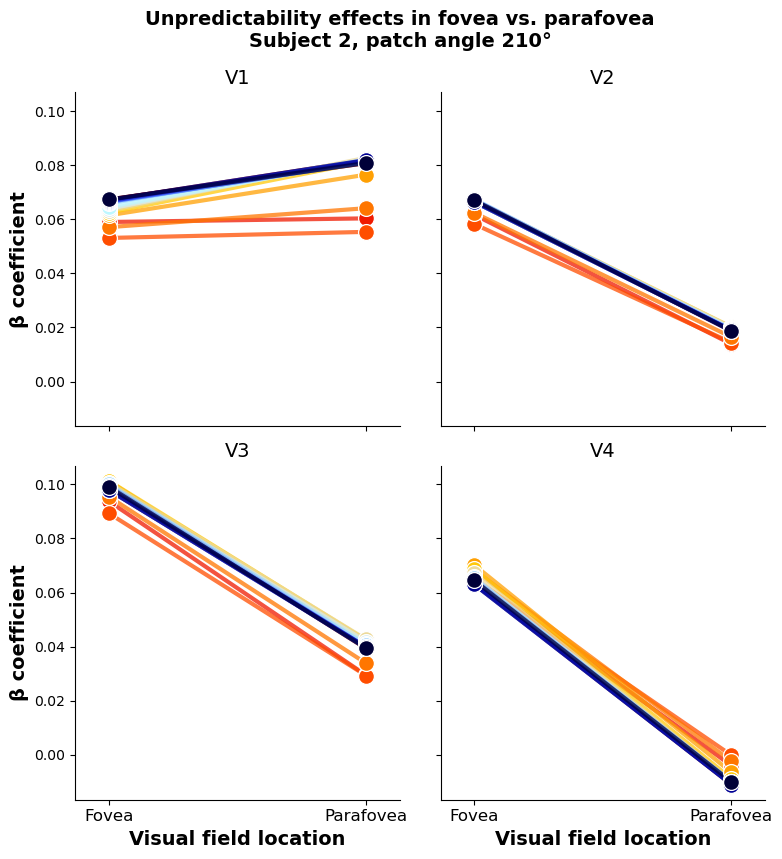

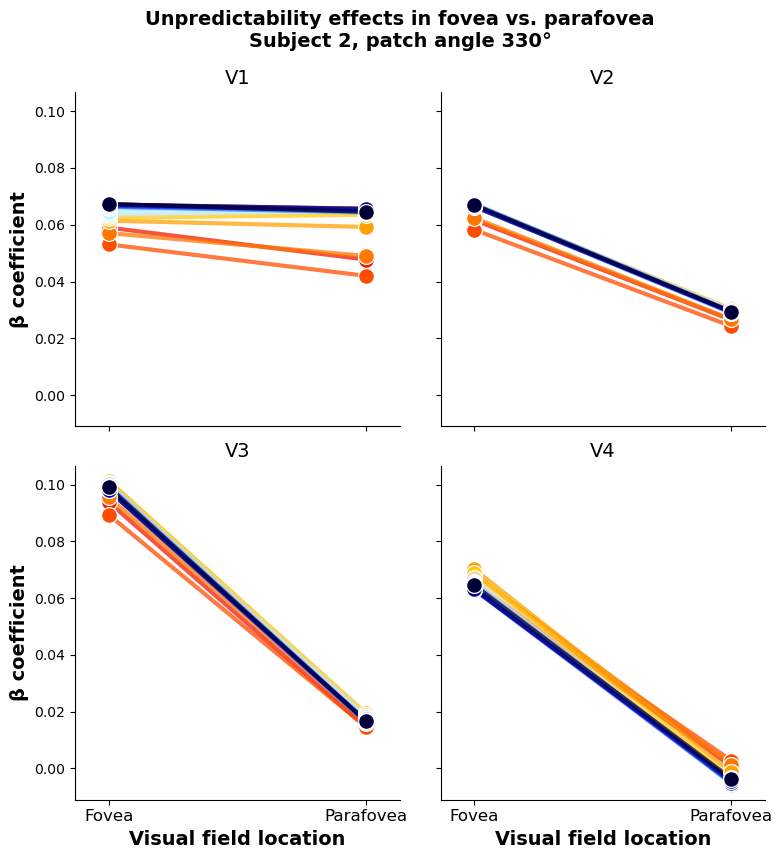

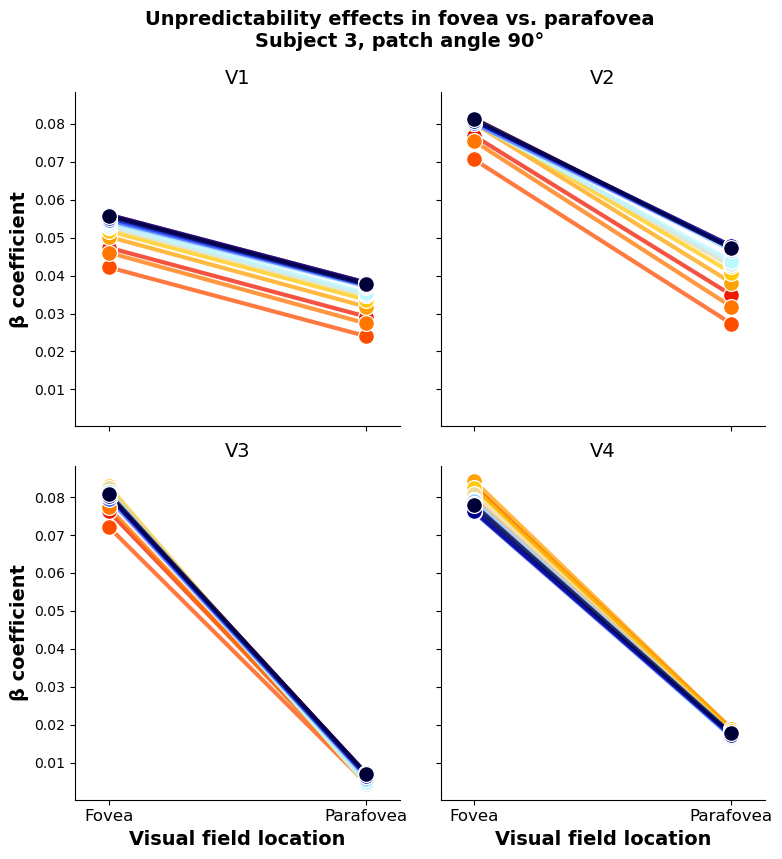

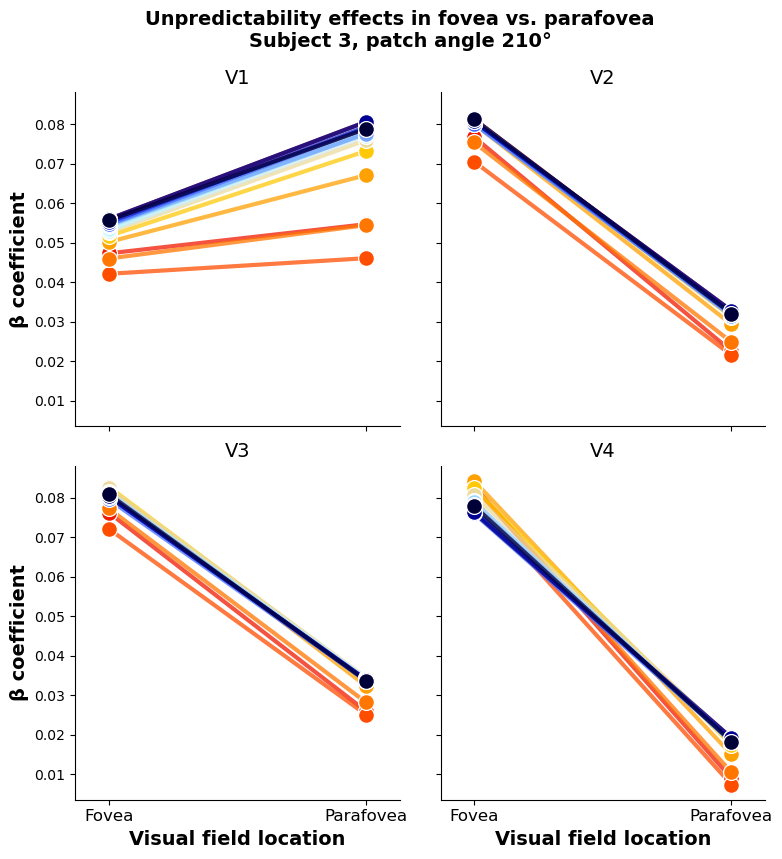

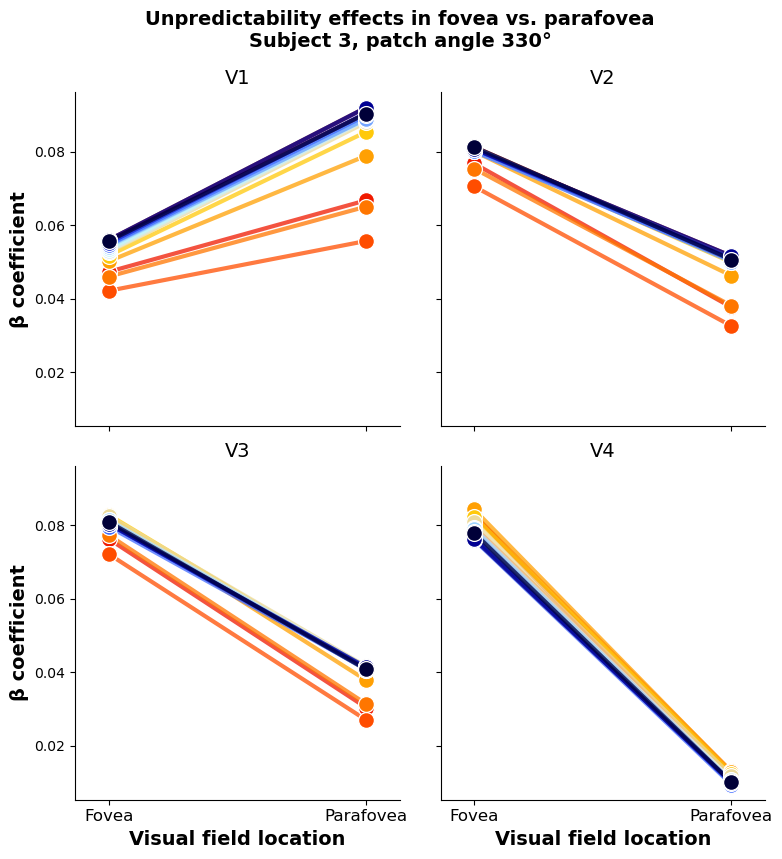

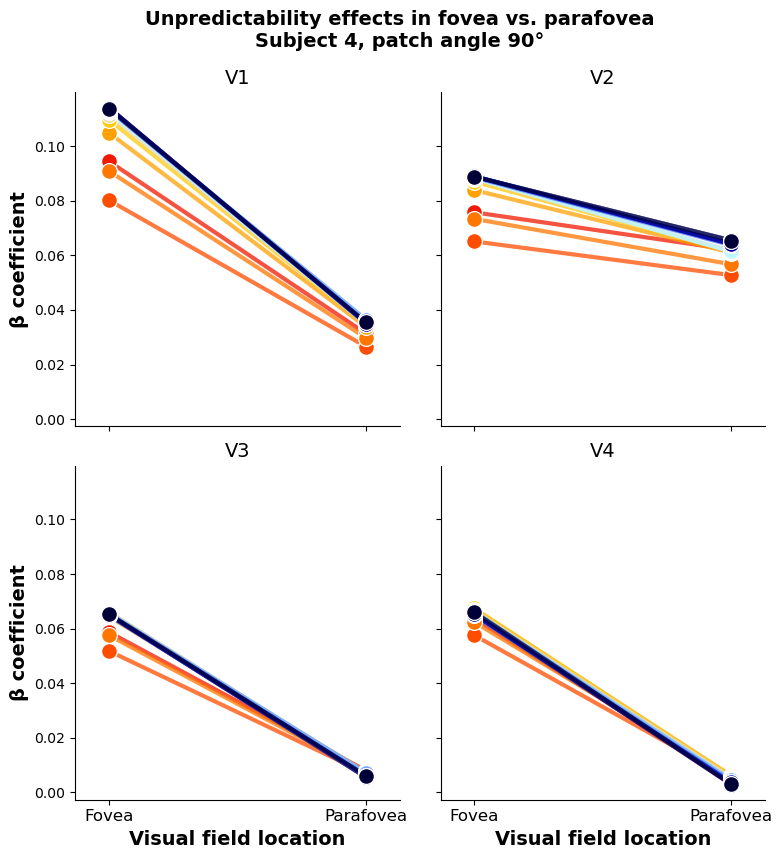

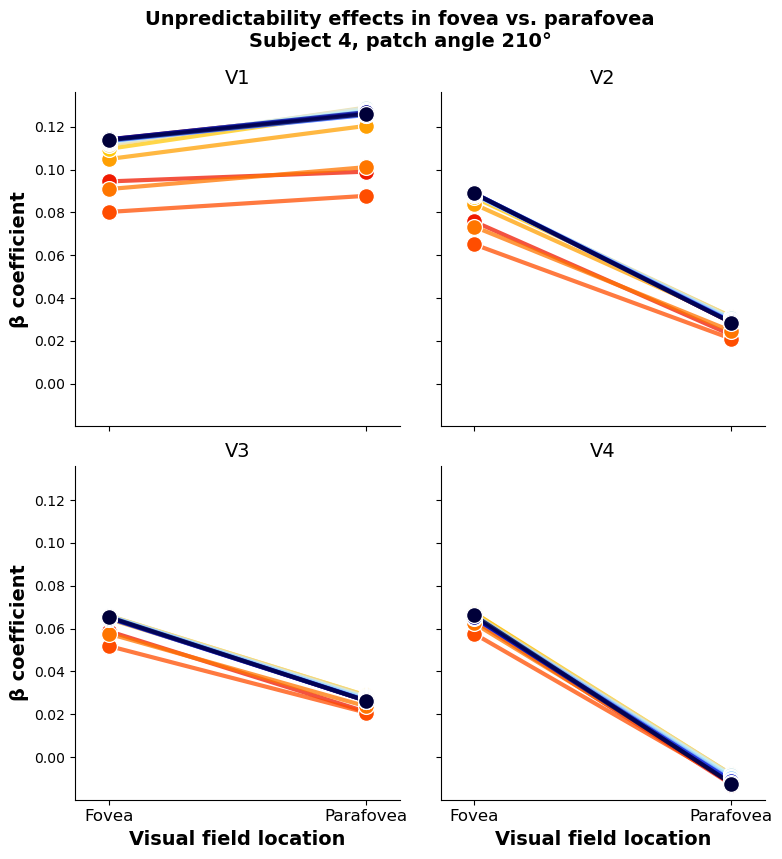

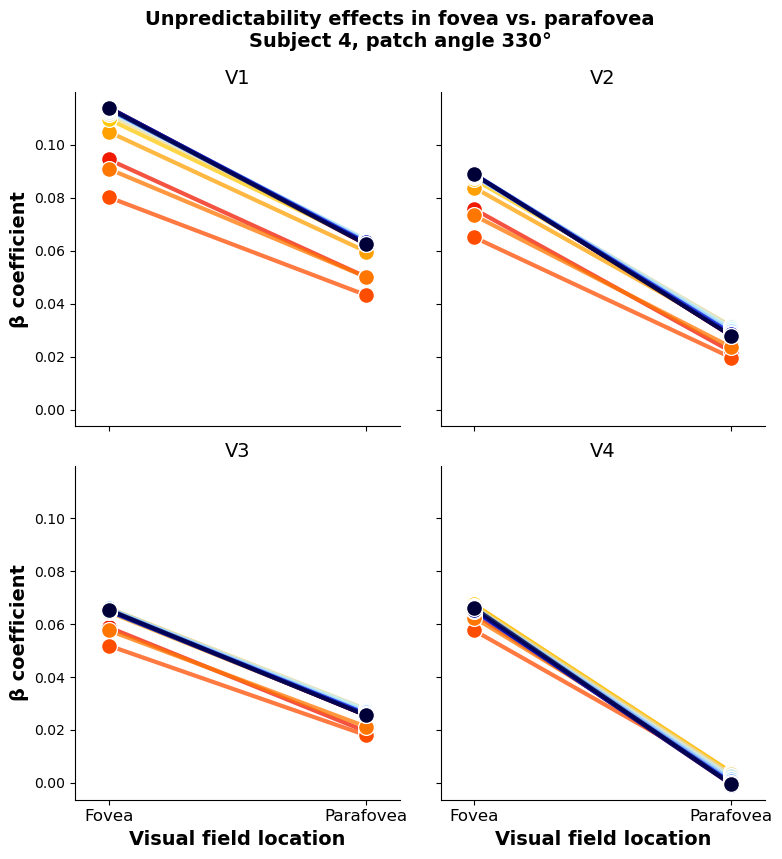

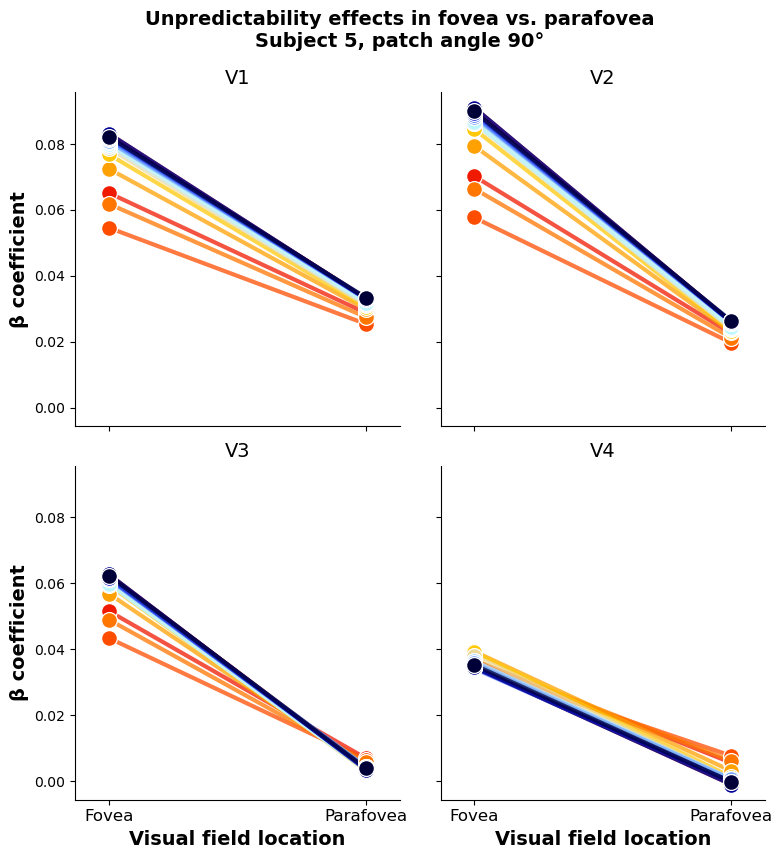

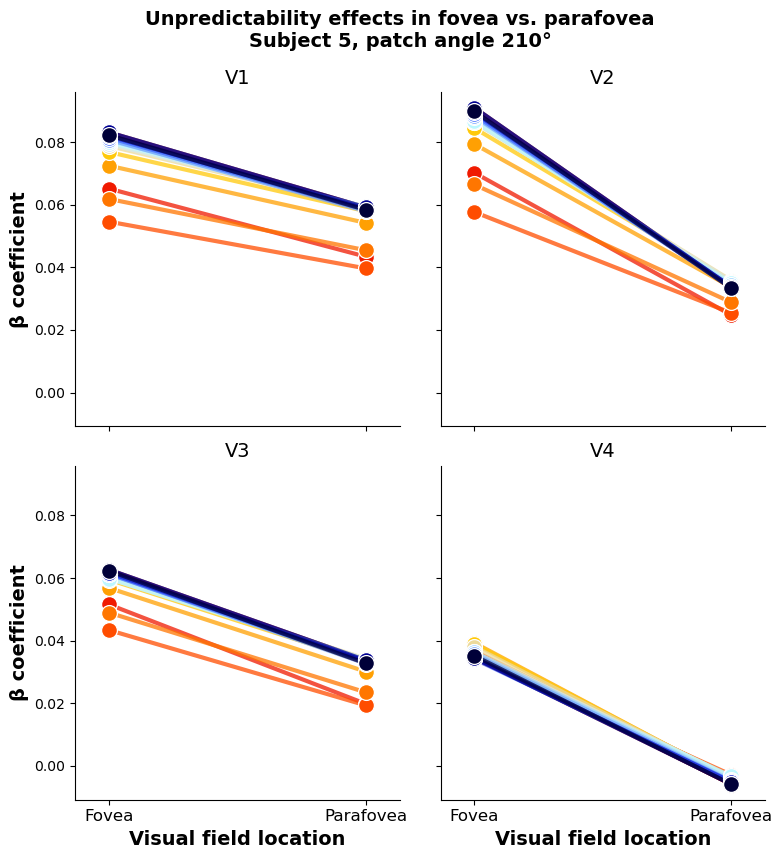

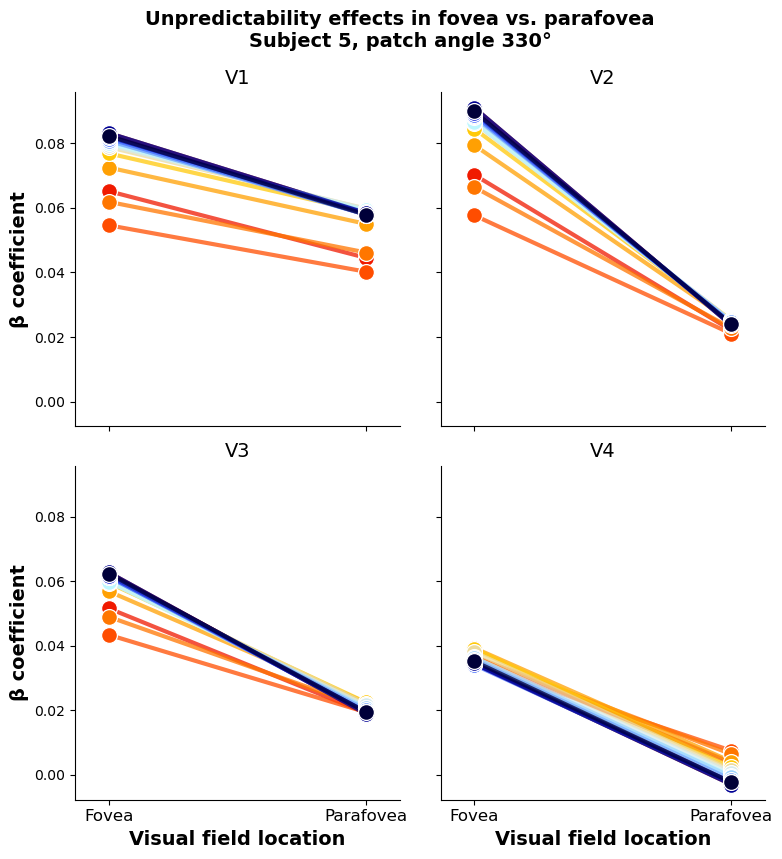

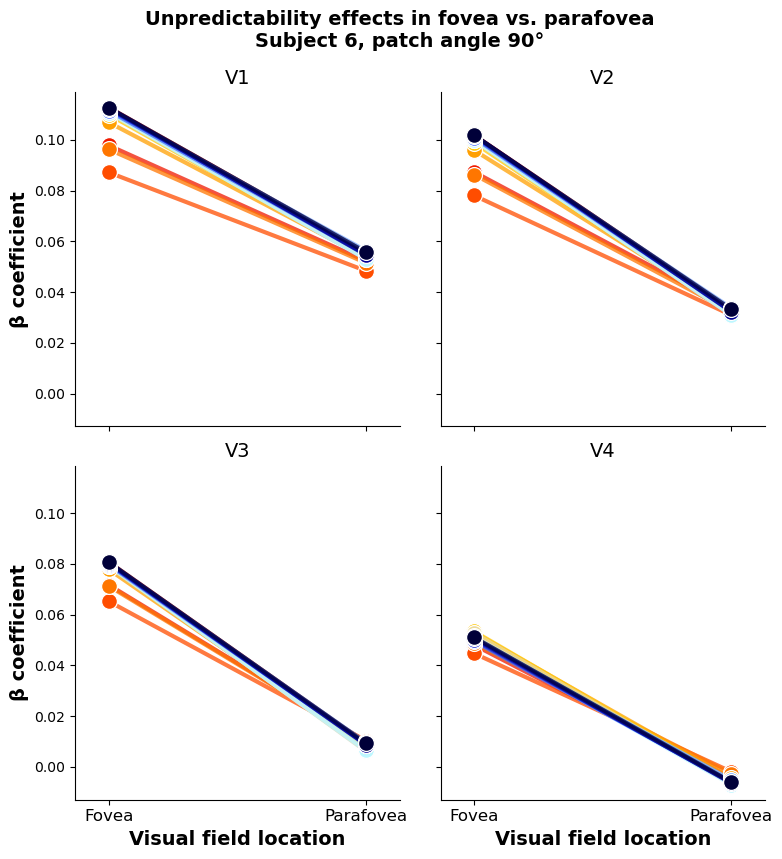

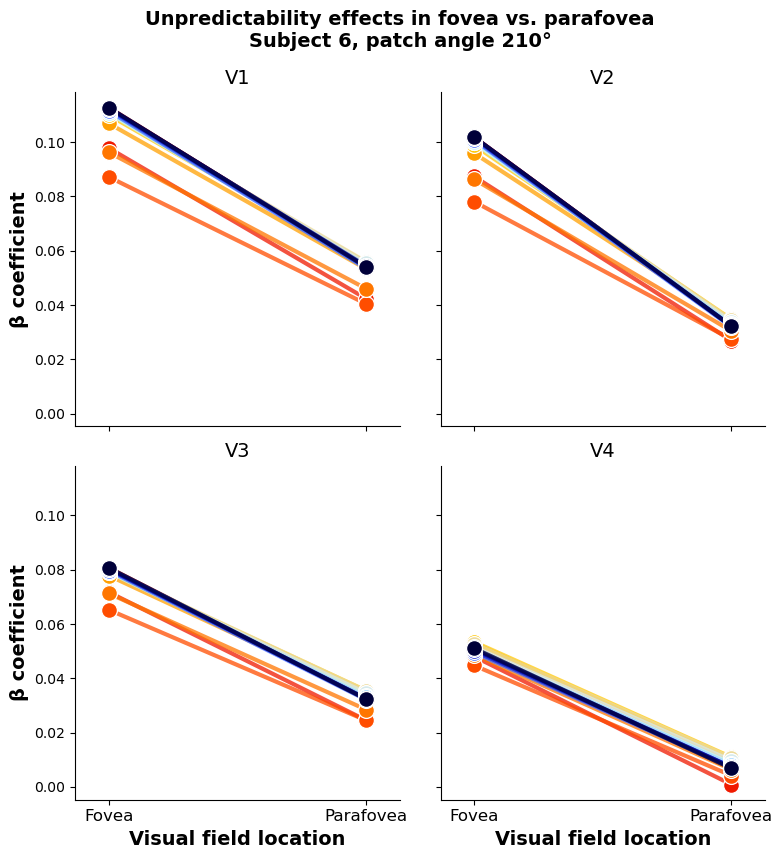

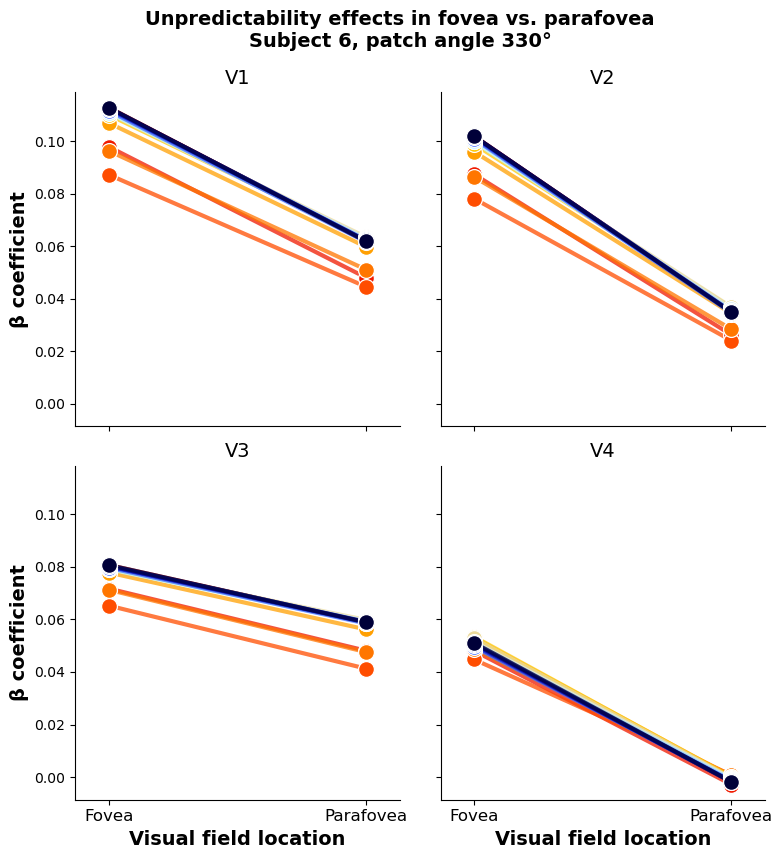

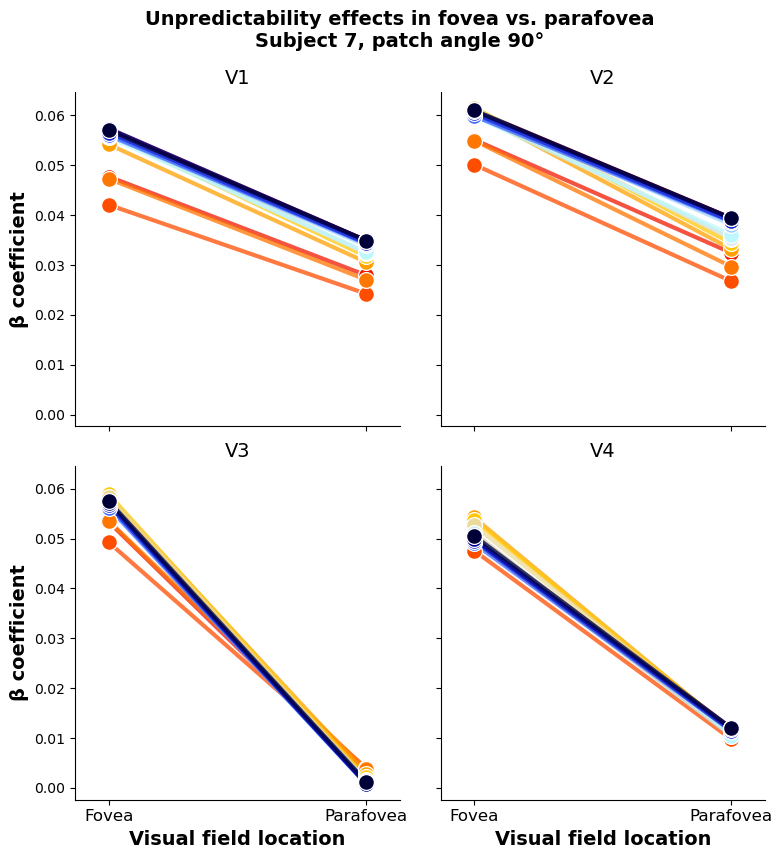

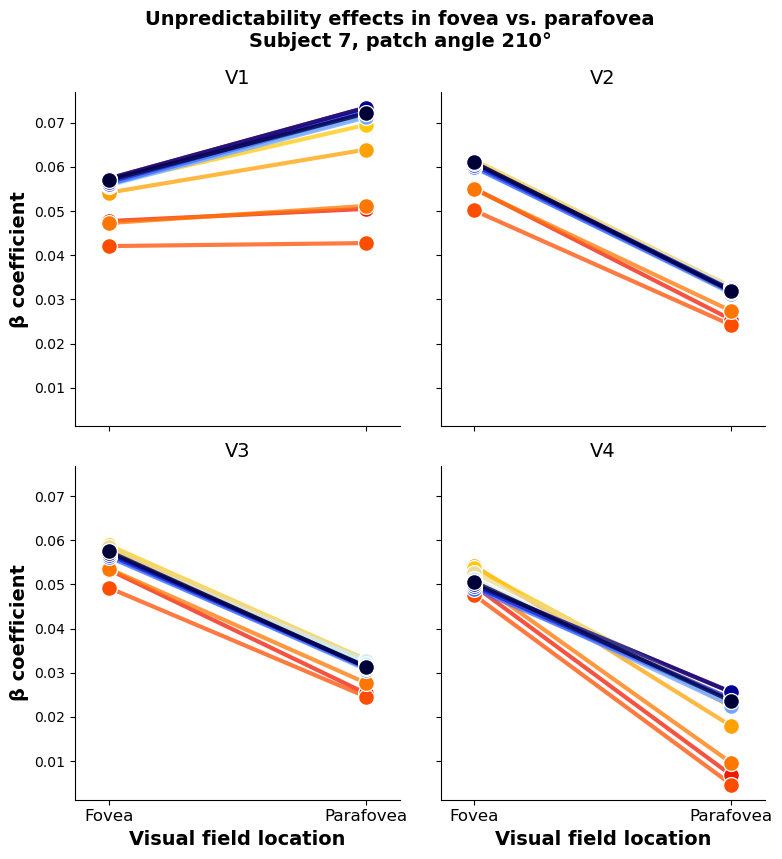

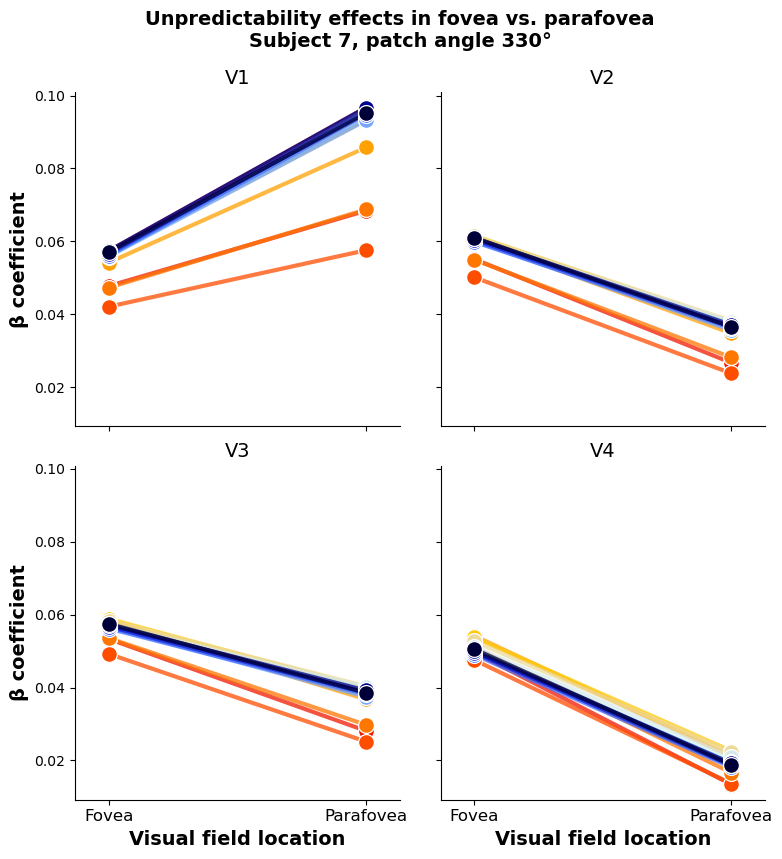

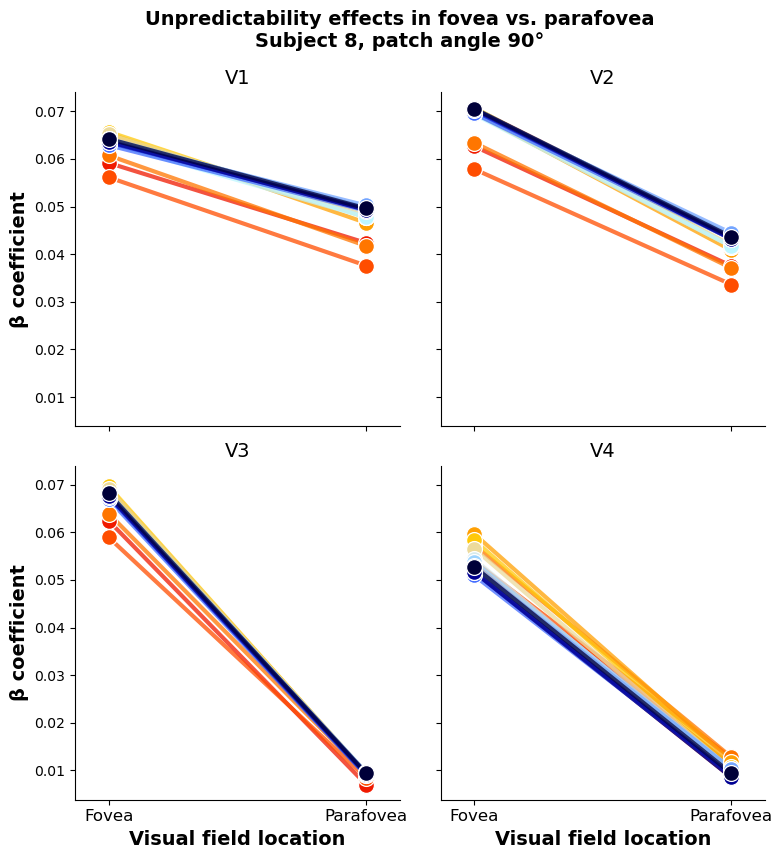

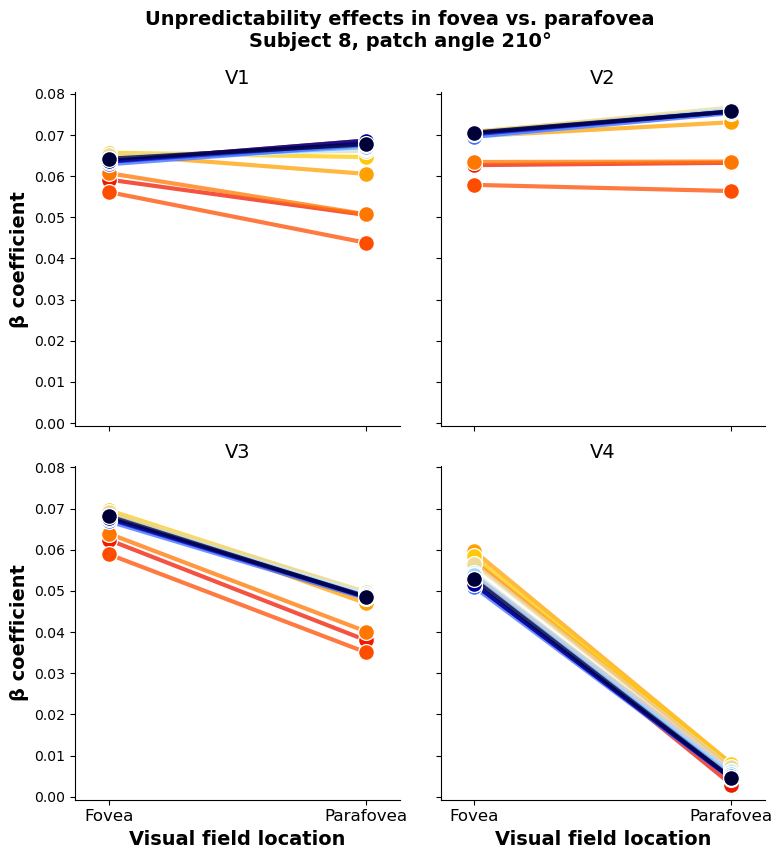

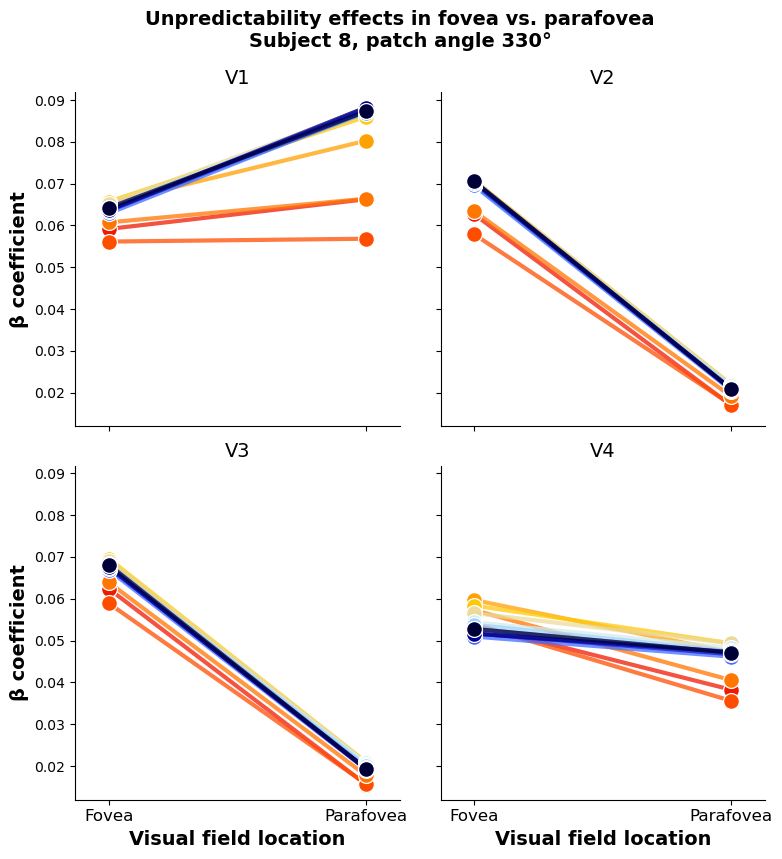

In [601]:
# fovperi_per_lay(subject="subj04", statistic="beta_unpred", angles=[90, 210, 330], alpha=1, cmap="jet")
for subject in NSP.subjects:
    for angle in [90, 210, 330]:
        fovperi_per_lay(subject=subject, statistic="beta_unpred", angles=[angle], alpha=.75, cmap="layassign")
    # testdf = fovperi_per_lay(subject=subject, statistic="beta_unpred", angles=[330], alpha=.75, cmap="layassign")

In [514]:
testdf

roi source abstraction_level  Δr values  abstraction_order  zorder
0    V1    fov     beta_unpred_2   0.113794                  2      16
1    V2    fov     beta_unpred_2   0.088874                  2      16
2    V3    fov     beta_unpred_2   0.065427                  2      16
3    V4    fov     beta_unpred_2   0.066132                  2      16
4    V1   peri     beta_unpred_2   0.126013                  2      16
..   ..    ...               ...        ...                ...     ...
123  V4    fov    beta_unpred_17   0.065292                 17       1
124  V1   peri    beta_unpred_17   0.126846                 17       1
125  V2   peri    beta_unpred_17   0.028706                 17       1
126  V3   peri    beta_unpred_17   0.026272                 17       1
127  V4   peri    beta_unpred_17  -0.012246                 17       1

[128 rows x 6 columns]

In [502]:
testdf

roi source abstraction_level  Δr values
0    V1    fov     beta_unpred_2   0.113794
1    V2    fov     beta_unpred_2   0.088874
2    V3    fov     beta_unpred_2   0.065427
3    V4    fov     beta_unpred_2   0.066132
4    V1   peri     beta_unpred_2   0.126013
..   ..    ...               ...        ...
123  V4    fov    beta_unpred_17   0.065292
124  V1   peri    beta_unpred_17   0.126846
125  V2   peri    beta_unpred_17   0.028706
126  V3   peri    beta_unpred_17   0.026272
127  V4   peri    beta_unpred_17  -0.012246

[128 rows x 4 columns]

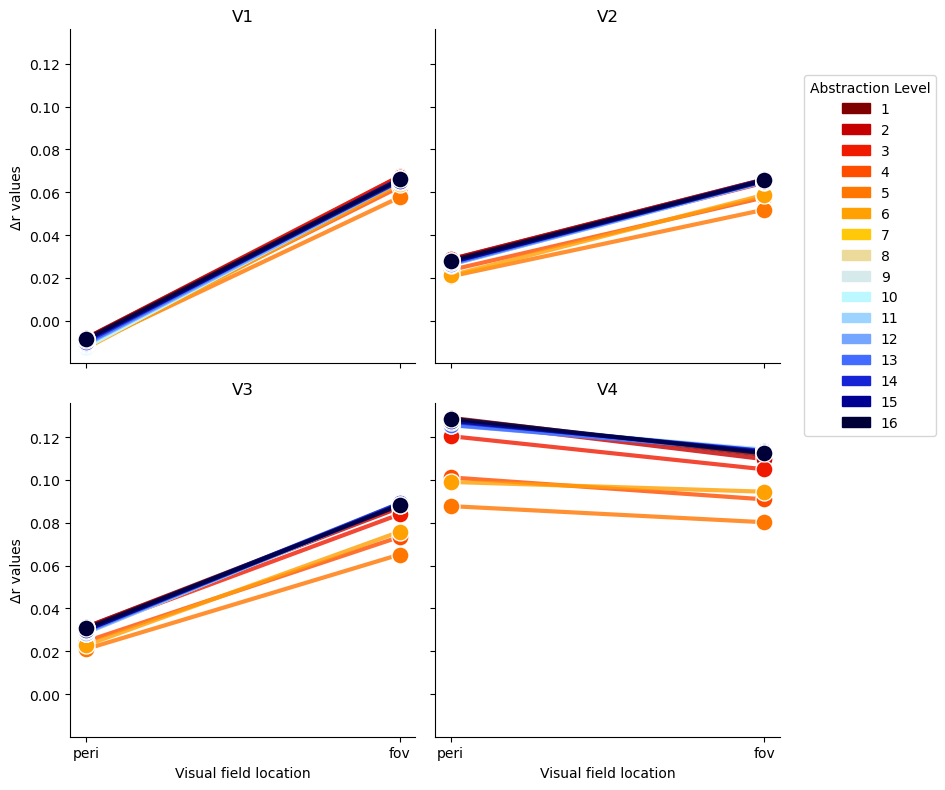

In [473]:
# fovperi_per_lay(subject="subj04", statistic="beta_unpred", angles=[90, 210, 330], alpha=1, cmap="jet")
# for subject in NSP.subjects[:1]:
fovperi_per_lay(subject="subj04", statistic="beta_unpred", angles=[210], alpha=.8, cmap="layassign")

/tmp/ipykernel_286707/2119014133.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cividis_r', len(long_df['abstraction_level'].unique()))


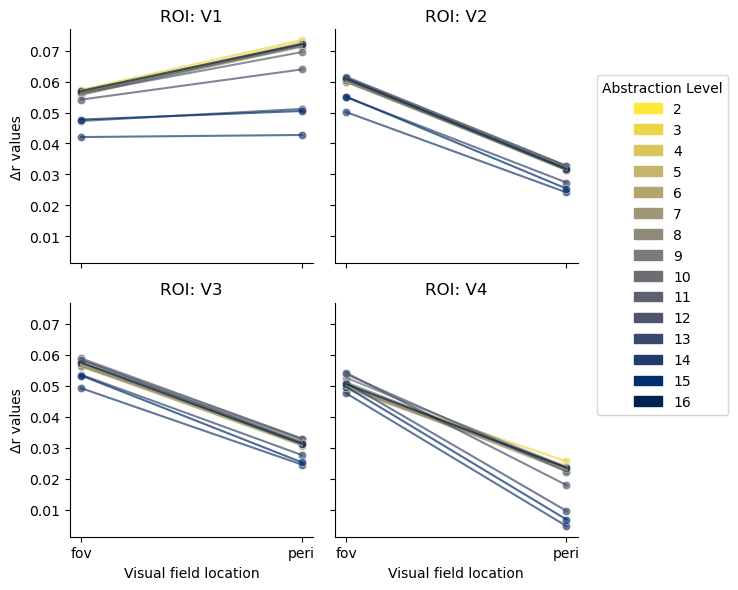

In [345]:
# ax = plt.gca()
_plot_df(combined_df,  "subj03")

### Central patch unpredictability delta r dataframe

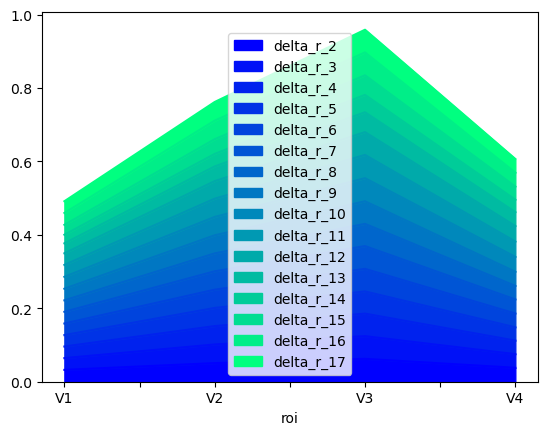

In [223]:
fov_results = rd(
    subject=subject,
    folder=f"unpred/vggfull_gabor_baseline",
    model="vggfull",
    statistic="delta_r",
    verbose=False,
    skip_norm_lay=True,
)  # Norm layer is not in the encoding featmaps (i think)

fov_df = fov_results.df

# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

# Plot the mean values
grouped.plot(kind='area', colormap='winter')

# Show the plot
plt.show()

In [237]:
grouped

delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  delta_r_7  \
roi                                                                     
V1    0.032271   0.032022   0.031643   0.031121   0.031598   0.031894   
V2    0.050656   0.050803   0.050133   0.049419   0.049772   0.050043   
V3    0.062333   0.061816   0.061315   0.060493   0.061505   0.062040   
V4    0.037914   0.037232   0.036928   0.036187   0.037593   0.038332   

     delta_r_8  delta_r_9  delta_r_10  delta_r_11  delta_r_12  delta_r_13  \
roi                                                                         
V1    0.031177   0.031699    0.032362    0.032486    0.031642    0.027162   
V2    0.048826   0.049289    0.050037    0.049730    0.047784    0.040051   
V3    0.060519   0.061581    0.062966    0.063341    0.062125    0.054141   
V4    0.036939   0.038522    0.040512    0.041812    0.042178    0.038002   

     delta_r_14  delta_r_15  delta_r_16  delta_r_17  
roi                                                  
V1     0.023438    0.026953    0.032271    0.032022  
V2     0.034065    0.040089    0.050656    0.050803  
V3     0.047347    0.053360    0.062333    0.061816  
V4     0.033813    0.035853    0.037914    0.037232

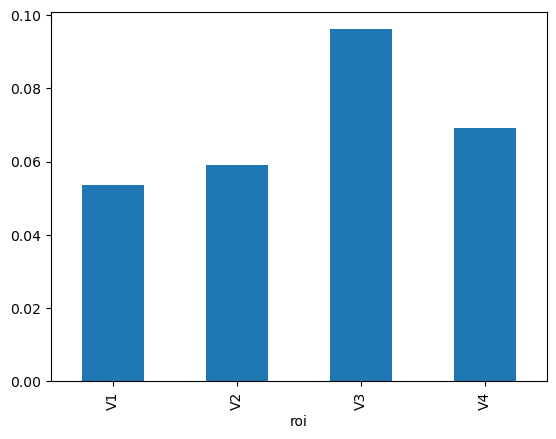

In [36]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

# Calculate the mean over all columns
fov_mean = grouped.mean(axis=1)

# Plot the mean values
fov_mean.plot(kind='bar')

# Show the plot
plt.show()

In [74]:
peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

peri_fov_df.columns = ['Fovea', 'Para-foveal']
peri_fov_df

Fovea  Para-foveal
roi                       
V1   0.053601     0.030791
V2   0.059145     0.021063
V3   0.096151     0.033496
V4   0.069210     0.015358

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

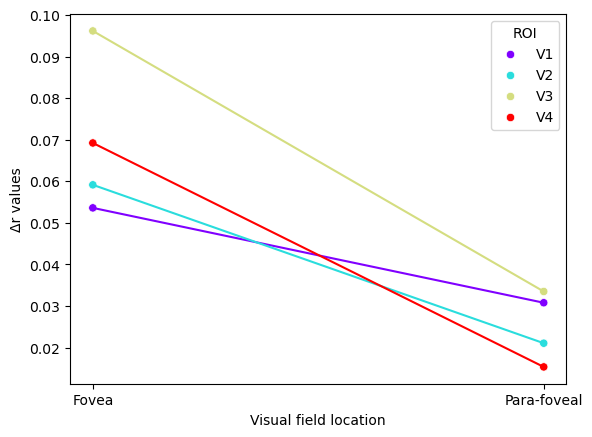

In [76]:
peri_fov_df = peri_fov_df.reset_index()

# Create a color map based on the unique values in the 'roi' column
colors = plt.cm.rainbow(np.linspace(0, 1, len(peri_fov_df['roi'].unique())))

# Melt the dataframe to long format for easier plotting with seaborn
long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

# Create a color palette with a different color for each unique 'roi' value
palette = dict(zip(peri_fov_df['roi'].unique(), colors))

# Create the line plot without a legend
sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False)

# Add the scatter plot
sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette)

# Change the x-axis title
plt.xlabel('Visual field location')

# Get the current legend
legend = plt.legend()

# Change the legend title
legend.set_title("ROI")

plt.show()

In [ ]:
for subject in NSP.subjects:
    fovperi_plot(subject, "delta_r")
    # print(subject)

In [14]:
def _get_fovea_df(subject:str, statistic:str="delta_r"):
    # Foveal results, delta r unpredictability
    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    fov_mean = fov_grouped.mean(axis=1)

    return fov_mean

def _get_peri_df(subject:str, statistic:str, angles:list=[90, 210, 330]):
    
    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate(angles):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    peri_mean = peri_grouped.mean(axis=1)

    return peri_mean

def fovperi_plot(subjects, statistic:str="delta_r", angles:list=[90, 210, 330]):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subjects (str or list): The subject(s)
    """    
    # If subjects is a string, make it a list
    if isinstance(subjects, str):
        subjects = [subjects]

    # Calculate the number of rows and columns for the subplots
    num_plots = len(subjects)
    num_rows = int(math.sqrt(num_plots))
    num_cols = num_plots // num_rows
    num_cols += num_plots % num_rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

    # Set a title for the entire figure
    fig.suptitle(f"Unpredictability sensitivity effects for foveal vs. para-foveal natural image patches (para-foveal patches at angles: {angles})", fontsize=16)

    # If there's only one subplot, axs is not a list
    if num_plots == 1:
        axs = [axs]

    # If axs is a numpy array, ravel it
    if isinstance(axs, np.ndarray):
        axs = axs.ravel()

    for ax, subject in zip(axs, subjects):
        fov_mean = _get_fovea_df(subject, statistic)
        peri_mean = _get_peri_df(subject, statistic, angles)

        peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

        peri_fov_df.columns = ['Fovea', 'Para-foveal']

        peri_fov_df = peri_fov_df.reset_index()

        _plot_df(peri_fov_df, ax, subject)

    # Remove unused subplots
    for ax in axs[num_plots:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

def _plot_df(peri_fov_df, ax, subject):
    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.hot(np.linspace(0, 1, len(peri_fov_df['roi'].unique())+2))


    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False, ax=ax)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, ax=ax)

    # Change the x-axis title
    ax.set_xlabel('Visual field location')

    ax.set_title(f"Subject {subject[-1]}")

    # Get the current legend
    legend = ax.legend()

    # Change the legend title
    legend.set_title("ROI")

In [22]:
def _get_fovea_df(subject:str, statistic:str="delta_r", aggregate_layers:bool=True):
    # Foveal results, delta r unpredictability
    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    if aggregate_layers:
        # Calculate the mean over all columns
        fov_mean = fov_grouped.mean(axis=1)
        return fov_mean
    else:
        # Add a prefix to column names
        fov_grouped = fov_grouped.add_prefix('Fovea_')
        # Add a new column 'a' with value 'Fovea'
        fov_grouped['a'] = 'Fovea'
    
        return fov_grouped


def _get_peri_df(subject:str, statistic:str, angles:list=[90, 210, 330], aggregate_layers:bool=True):
    
    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate(angles):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    if aggregate_layers:
        # Calculate the mean over all columns
        peri_mean = peri_grouped.mean(axis=1)
        return peri_mean
    else: 
        # Add a prefix to column names
        peri_grouped = peri_grouped.add_prefix('Peri_')
    
        # Add a new column 'a' with value 'Para-foveal'
        peri_grouped['a'] = 'Para-foveal'
        return peri_grouped

def fovperi_plot(subjects, statistic:str="delta_r", angles:list=[90, 210, 330], aggregate_layers:bool=True):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subjects (str or list): The subject(s)
    """    
    # If subjects is a string, make it a list
    if isinstance(subjects, str):
        subjects = [subjects]

    # Calculate the number of rows and columns for the subplots
    num_plots = len(subjects)
    num_rows = int(math.sqrt(num_plots))
    num_cols = num_plots // num_rows
    num_cols += num_plots % num_rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

    # Set a title for the entire figure
    fig.suptitle(f"Unpredictability sensitivity effects for foveal vs. para-foveal natural image patches (para-foveal patches at angles: {angles})", fontsize=16)

    # If there's only one subplot, axs is not a list
    if num_plots == 1:
        axs = [axs]

    # If axs is a numpy array, ravel it
    if isinstance(axs, np.ndarray):
        axs = axs.ravel()

    for ax, subject in zip(axs, subjects):
        fov_data = _get_fovea_df(subject, statistic, aggregate_layers)
        peri_data = _get_peri_df(subject, statistic, angles, aggregate_layers)

        if aggregate_layers:
            peri_fov_df = pd.concat([fov_data, peri_data], axis=1)
            peri_fov_df.columns = ['Fovea', 'Para-foveal']
        else:
            # Stack the dataframes vertically
            fov_data['Location'] = 'Fovea'
            peri_data['Location'] = 'Para-foveal'
            peri_fov_df = pd.concat([fov_data, peri_data], axis=0)

        peri_fov_df = peri_fov_df.reset_index()

        _plot_df(peri_fov_df, ax, subject, aggregate_layers)

    # Remove unused subplots
    for ax in axs[num_plots:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

def _plot_df(peri_fov_df, ax, subject, aggregate_layers):
    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.hot(np.linspace(0, 1, len(peri_fov_df['roi'].unique())+2))


    # Melt the dataframe to long format for easier plotting with seaborn
    if aggregate_layers:
        long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')
    else:
        # Melt the dataframe including the new column names
        long_df = peri_fov_df.melt(id_vars=['roi', 'Location'], value_vars=[col for col in peri_fov_df.columns if col not in ['roi', 'Location']], var_name='Layer', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False, ax=ax)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, ax=ax)

    # Change the x-axis title
    ax.set_xlabel('Visual field location')
    # ax.set_ylabel('β coefficient')

    ax.set_title(f"Subject {subject[-1]}")
    ax.set_ylim(bottom=0)

    # Get the current legend
    legend = ax.legend()

    # Change the legend title
    legend.set_title("ROI")

### I also want to check what the layer-specific impact is between fovea and para-fovea. This could inform me about the role of the type of unpredictability that perhaps can explain why V1 appears to be more responsive to unpredictability of para-foveal input.

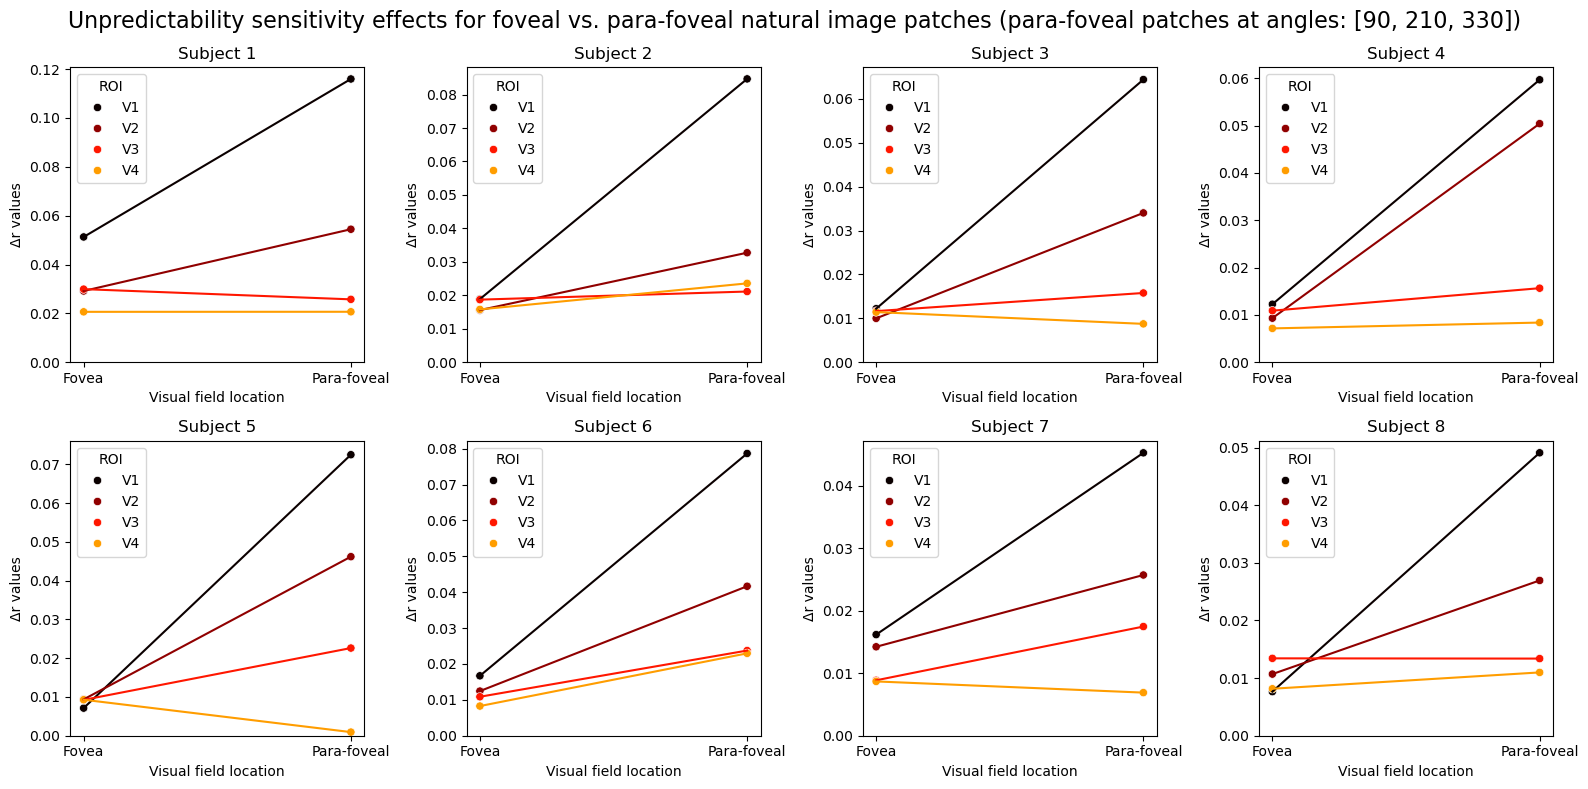

In [24]:
# for angle in [90, 210, 330]:
    # fovperi_plot(NSP.subjects, "beta_unpred", angles=[angle])
    # fovperi_plot("subj01", "beta_unpred", angles=[angle])

fovperi_plot(NSP.subjects, "R_alt_model", angles=[90, 210, 330])

# fovperi_plot(NSP.subjects, "delta_r", angles=[90, 210, 330])
# fovperi_plot(NSP.subjects, "delta_r")



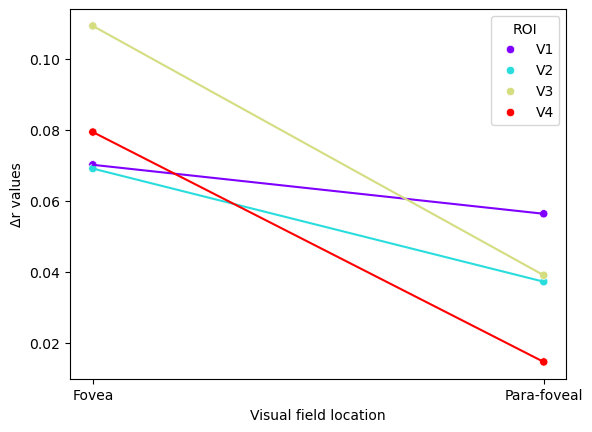

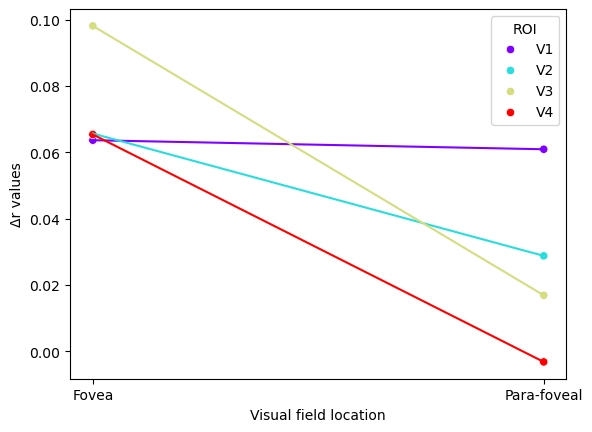

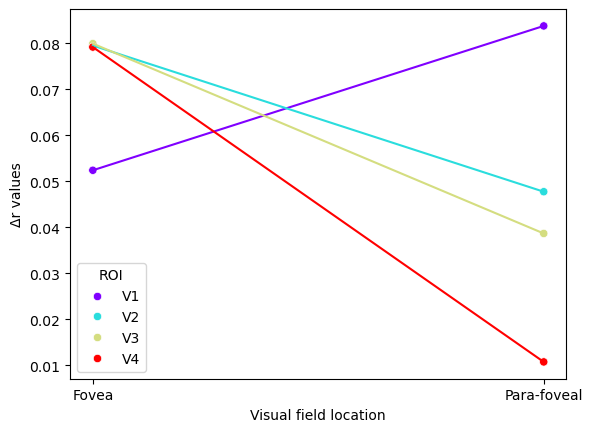

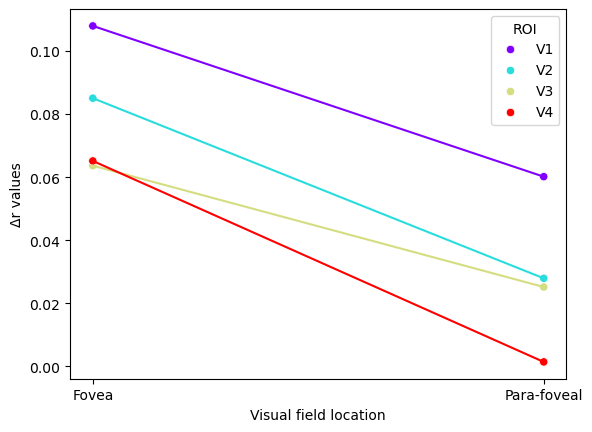

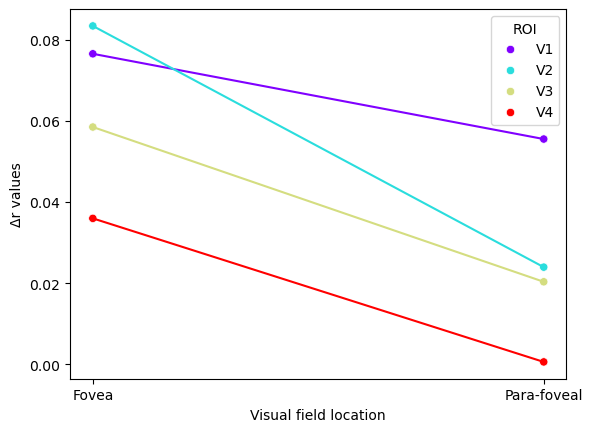

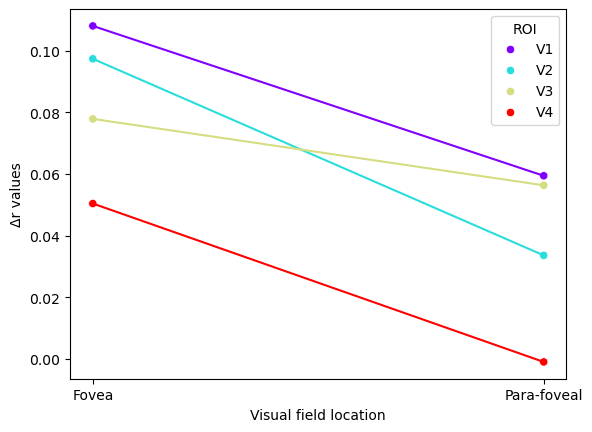

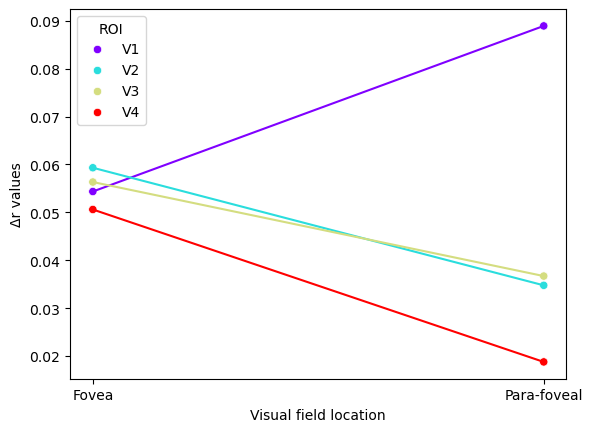

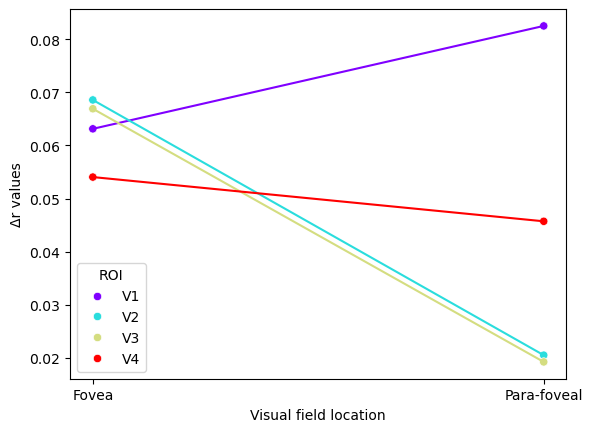

In [103]:




for subject in NSP.subjects:
    fovperi_plot(subject, "beta_unpred", angles=[330])


